In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import seaborn as sns
import matplotlib.pyplot as plt # for data visualization

import plotly.express as px

In [2]:
df1 = pd.read_csv("QVI_transaction_data.csv")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [3]:
df1['DATE'] = pd.to_datetime(df1['DATE'],errors='coerce',unit='d',origin='1900-01-01')
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [78]:
#Adding Columns of Moth and Year 
# To check which month and which year has higest values.
df1['Year']=pd.DatetimeIndex(df1['DATE']).year
df1['Month']=pd.DatetimeIndex(df1['DATE']).month
df1['Month'].value_counts()

12    22853
3     22628
7     22571
8     22488
5     22404
10    22342
1     22143
11    21798
6     21797
4     21727
9     21673
2     20412
Name: Month, dtype: int64

In [79]:
df1['Year'].value_counts()

2019    132600
2018    132236
Name: Year, dtype: int64

In [5]:
df1.head(20)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8
5,2019-05-21,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,2019,5
6,2019-05-18,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,2019,5
7,2019-05-18,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,2019,5
8,2018-08-22,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,2018,8
9,2018-08-20,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,2018,8


In [6]:
df1['BRAND']=df1['PROD_NAME'].apply(lambda x : x.strip().split()[0])
df1['BRAND'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND, dtype: int64

In [7]:
#we can see there is inconsistencies in brand names
brands = {'Dorito':'Doritos','Infzns':'Infuzions','Snbts':'Sunbites','Grain':'Grain Wave','NCC':'Natural',
          'Red':'RRD','Smith':'Smiths','ww':'Woolworths'}
df1['BRAND'] = df1['BRAND'].replace(brands)
df1['BRAND']

0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND, Length: 264836, dtype: object

In [8]:
#to extract packet size
def get_size(packet):
    size=[]
    for item in packet:
        if item.isdigit():
            size.append(item)
    return int("".join(size))

In [53]:
df1['Packet_size']=df1['PROD_NAME'].apply(lambda a : get_size(a))
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,Natural,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,CCs,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,Smiths,170
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,Smiths,175
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,Kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,Kettle,175
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,Tostitos,175
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,Doritos,170
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,Doritos,150


In [10]:
df1['PROD_NAME'].value_counts()

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 114, dtype: int64

In [11]:
#After chexking Woolworths Medium Salasa is a sauce name not chips so need to remove salsa
Updated_df= df1[df1['PROD_NAME']!='Woolworths Medium   Salsa 300g']
Updated_df['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 263406, dtype: object

In [46]:
Updated_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018,10,Natural,175
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019,5,CCs,175
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019,5,Smiths,170
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018,8,Smiths,175
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018,8,Kettle,150
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019,3,Kettle,175
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018,8,Tostitos,175
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018,11,Doritos,170
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018,12,Doritos,150


In [47]:
Updated_df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
Year              0
Month             0
BRAND             0
Packet_size       0
dtype: int64

In [48]:
Updated_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Year,Month,Packet_size
count,263406.000000,2.634060e+05,2.634060e+05,263406.000000,263406.000000,263406.000000,263406.000000,263406.000000,263406.000000
mean,135.069095,1.355402e+05,1.351469e+05,56.477745,1.907413,7.328478,2018.500702,6.536070,181.788714
std,76.786470,8.060231e+04,7.813647e+04,32.884349,0.644861,3.073625,0.500000,3.448759,63.914001
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,2018.000000,1.000000,70.000000
25%,70.000000,7.001700e+04,6.757825e+04,28.000000,2.000000,5.400000,2018.000000,4.000000,150.000000
50%,130.000000,1.303555e+05,1.351305e+05,55.000000,2.000000,7.400000,2019.000000,7.000000,170.000000
75%,203.000000,2.030928e+05,2.026918e+05,85.000000,2.000000,9.200000,2019.000000,10.000000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,2019.000000,12.000000,380.000000


In [49]:
Updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263406 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            263406 non-null  datetime64[ns]
 1   STORE_NBR       263406 non-null  int64         
 2   LYLTY_CARD_NBR  263406 non-null  int64         
 3   TXN_ID          263406 non-null  int64         
 4   PROD_NBR        263406 non-null  int64         
 5   PROD_NAME       263406 non-null  object        
 6   PROD_QTY        263406 non-null  int64         
 7   TOT_SALES       263406 non-null  float64       
 8   Year            263406 non-null  int64         
 9   Month           263406 non-null  int64         
 10  BRAND           263406 non-null  object        
 11  Packet_size     263406 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(2)
memory usage: 26.1+ MB


In [54]:
Updated_df.duplicated().sum()

1

In [55]:
df2 = pd.read_csv("QVI_purchase_behaviour.csv")
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [56]:
df2.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [58]:
df= Updated_df.merge(df2, how='right')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,2018.0,10.0,Natural,175.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-18,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,2018.0,9.0,RRD,150.0,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-09,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,2019.0,3.0,Grain Wave,210.0,YOUNG FAMILIES,Budget
3,2019-03-10,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,2019.0,3.0,Natural,175.0,YOUNG FAMILIES,Budget
4,2018-11-04,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,2018.0,11.0,WW,160.0,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263504,2018-12-10,88.0,2370701,240378.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,2018.0,12.0,Grain Wave,210.0,YOUNG FAMILIES,Mainstream
263505,2018-10-03,88.0,2370751,240394.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,2018.0,10.0,Kettle,150.0,YOUNG FAMILIES,Premium
263506,2018-10-26,88.0,2370961,240480.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,2018.0,10.0,Tyrrells,165.0,OLDER FAMILIES,Budget
263507,2018-10-29,88.0,2370961,240481.0,65.0,Old El Paso Salsa Dip Chnky Tom Ht300g,2.0,10.2,2018.0,10.0,Old,300.0,OLDER FAMILIES,Budget


In [59]:
df.to_csv("purchase-transaction-file.csv")


In [60]:
df = pd.read_csv("purchase-transaction-file.csv")
df

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-19,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,2018.0,10.0,Natural,175.0,YOUNG SINGLES/COUPLES,Premium
1,1,2018-09-18,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,2018.0,9.0,RRD,150.0,YOUNG SINGLES/COUPLES,Mainstream
2,2,2019-03-09,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,2019.0,3.0,Grain Wave,210.0,YOUNG FAMILIES,Budget
3,3,2019-03-10,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,2019.0,3.0,Natural,175.0,YOUNG FAMILIES,Budget
4,4,2018-11-04,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,2018.0,11.0,WW,160.0,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263504,263504,2018-12-10,88.0,2370701,240378.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,2018.0,12.0,Grain Wave,210.0,YOUNG FAMILIES,Mainstream
263505,263505,2018-10-03,88.0,2370751,240394.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,2018.0,10.0,Kettle,150.0,YOUNG FAMILIES,Premium
263506,263506,2018-10-26,88.0,2370961,240480.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,2018.0,10.0,Tyrrells,165.0,OLDER FAMILIES,Budget
263507,263507,2018-10-29,88.0,2370961,240481.0,65.0,Old El Paso Salsa Dip Chnky Tom Ht300g,2.0,10.2,2018.0,10.0,Old,300.0,OLDER FAMILIES,Budget


In [61]:
df.isnull().sum()

Unnamed: 0            0
DATE                103
STORE_NBR           103
LYLTY_CARD_NBR        0
TXN_ID              103
PROD_NBR            103
PROD_NAME           103
PROD_QTY            103
TOT_SALES           103
Year                103
Month               103
BRAND               103
Packet_size         103
LIFESTAGE             0
PREMIUM_CUSTOMER      0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PROD_QTY'>

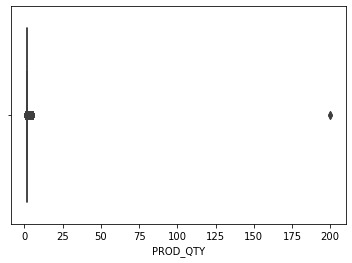

In [63]:
sns.boxplot(df.PROD_QTY)

In [64]:
df[df['PROD_QTY']==200]

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size,LIFESTAGE,PREMIUM_CUSTOMER
220522,220522,2018-08-21,226.0,226000,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,2018.0,8.0,Doritos,380.0,OLDER FAMILIES,Premium
220523,220523,2019-05-22,226.0,226000,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,2019.0,5.0,Doritos,380.0,OLDER FAMILIES,Premium


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='TOT_SALES'>

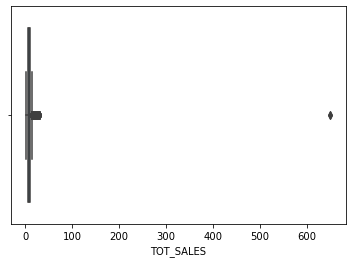

In [65]:
sns.boxplot(df.TOT_SALES)



In [66]:
df[df['TOT_SALES']>600]

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size,LIFESTAGE,PREMIUM_CUSTOMER
220522,220522,2018-08-21,226.0,226000,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,2018.0,8.0,Doritos,380.0,OLDER FAMILIES,Premium
220523,220523,2019-05-22,226.0,226000,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,2019.0,5.0,Doritos,380.0,OLDER FAMILIES,Premium


In [75]:
#Removing Outliers
df= df[df['TOT_SALES']!=650]
df

,Unnamed: 0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Year,Month,BRAND,Packet_size,LIFESTAGE,PREMIUM_CUSTOMER
0,0,2018-10-19,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,2018.0,10.0,Natural,175.0,YOUNG SINGLES/COUPLES,Premium
1,1,2018-09-18,1.0,1002,2.0,58.0,Red Rock Deli Chikn&Garlic Aioli 150g,1.0,2.7,2018.0,9.0,RRD,150.0,YOUNG SINGLES/COUPLES,Mainstream
2,2,2019-03-09,1.0,1003,3.0,52.0,Grain Waves Sour Cream&Chives 210G,1.0,3.6,2019.0,3.0,Grain Wave,210.0,YOUNG FAMILIES,Budget
3,3,2019-03-10,1.0,1003,4.0,106.0,Natural ChipCo Hony Soy Chckn175g,1.0,3.0,2019.0,3.0,Natural,175.0,YOUNG FAMILIES,Budget
4,4,2018-11-04,1.0,1004,5.0,96.0,WW Original Stacked Chips 160g,1.0,1.9,2018.0,11.0,WW,160.0,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263504,263504,2018-12-10,88.0,2370701,240378.0,24.0,Grain Waves Sweet Chilli 210g,2.0,7.2,2018.0,12.0,Grain Wave,210.0,YOUNG FAMILIES,Mainstream
263505,263505,2018-10-03,88.0,2370751,240394.0,60.0,Kettle Tortilla ChpsFeta&Garlic 150g,2.0,9.2,2018.0,10.0,Kettle,150.0,YOUNG FAMILIES,Premium
263506,263506,2018-10-26,88.0,2370961,240480.0,70.0,Tyrrells Crisps Lightly Salted 165g,2.0,8.4,2018.0,10.0,Tyrrells,165.0,OLDER FAMILIES,Budget
263507,263507,2018-10-29,88.0,2370961,240481.0,65.0,Old El Paso Salsa Dip Chnky Tom Ht300g,2.0,10.2,2018.0,10.0,Old,300.0,OLDER FAMILIES,Budget


In [95]:
df['TOT_SALES'].value_counts()

9.2     22821
7.4     22513
6.0     20796
7.6     20212
8.8     19900
        ...  
6.9         3
15.5        3
12.4        2
11.2        2
4.5         2
Name: TOT_SALES, Length: 111, dtype: int64